# Gender Classification Using Pytorch + Fastai and concepts of transfer learning

<b> In this project, we will be utilizing pytorch and fastai library to classify whether a person's image contains male or female. We will use transfer learning to further train a CNN model that has previously been trained on imagenet dataset. Furthermore, we will also make use of fastai library to collect data from google images. </b>

In [1]:
from fastai.vision import *

## Downloading the images

```
I used the following javaScript to scrape images from google images to create my custom dataset.

var urls = [];
var count = 0;
[...document.querySelectorAll('.rg_i')].forEach((element, index) => {
   let el = element.parentElement.parentElement;
   el.click();
   count++;
   setTimeout(() => {
       let google_url = el.href;

       let start = google_url.indexOf('=' , google_url.indexOf('imgurl'))+1;
       let encoded = google_url.substring(start, google_url.indexOf('&', start));
       let url = decodeURIComponent(encoded);
       urls.push(url);
       console.log(count);
       if(--count == 0) {
          let textToSave = urls.join('\n');
          let hiddenElement = document.createElement('a');
          hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
          hiddenElement.target = '_blank';
          hiddenElement.download = 'urls.txt';
          hiddenElement.click();
       }

   }, 50);

});
```

In [6]:
folder = 'male'
file = 'male_download - Copy.csv'

In [10]:
folder = 'female'
file = 'female_download - Copy.csv'

In [11]:
path = Path('data/genders')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
path.ls()

[PosixPath('data/genders/male'),
 PosixPath('data/genders/female'),
 PosixPath('data/genders/male_download - Copy.csv'),
 PosixPath('data/genders/female_download.txt')]

In [9]:
classes = ['male','female']

In [12]:
download_images(path/file, dest, max_pics=200)

Error https://themillennialsnowflake.com/wp-content/uploads/fake-FB-profile-.jpg ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


Lets check if our images are not corrupt for each class. 

In [13]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

male


cannot identify image file <_io.BufferedReader name='data/genders/male/00000008.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/male/00000025.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/male/00000013.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/male/00000001.jpg'>


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


cannot identify image file <_io.BufferedReader name='data/genders/male/00000040.jpg'>


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


cannot identify image file <_io.BufferedReader name='data/genders/male/00000048.jpg'>
female


cannot identify image file <_io.BufferedReader name='data/genders/female/00000166.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000176.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000170.png'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000055.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000117.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000048.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000009.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000079.jpg'>
cannot identify image file <_io.BufferedReader name='data/genders/female/00000062.jpg'>
cannot identify image file <_io.

This means not  all of our scapred images for males and females are valid and working. Hence, some of the male and female images were corrupt and they have been hence deleted.

In [14]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [15]:
import warnings
warnings.filterwarnings('ignore')

np.random.seed(420)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

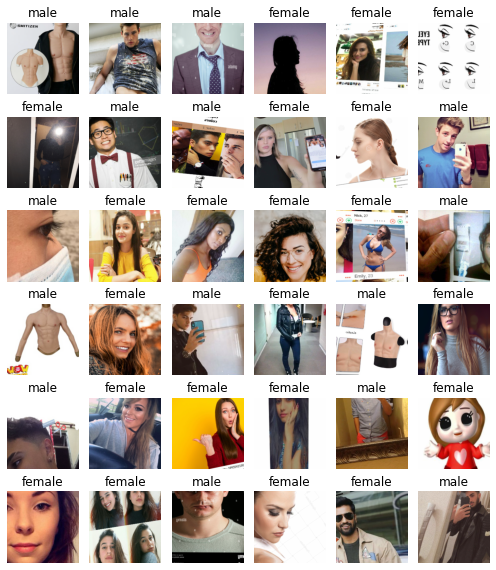

In [16]:
data.show_batch(rows=6, figsize=(7,8))

In [17]:
data.classes,data.c

(['female', 'male'], 2)

## Training our model with a restnet34 (A CNN with 34 Layers)

In [18]:
model = cnn_learner(data, models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [19]:
model

Learner(data=ImageDataBunch;

Train: LabelList (290 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
male,male,male,male,male
Path: data/genders;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
female,female,female,male,male
Path: data/genders;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

<b> Lets train our model on original weights of our pretrained model </b>

In [20]:
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.205567,0.428380,0.819444,00:16
1,0.915861,0.272168,0.847222,00:15
2,0.732542,0.270333,0.916667,00:15
3,0.627765,0.288293,0.916667,00:15


lets save our trained model's weights

In [21]:
model.save('stage-1')

In [22]:
model.unfreeze()

In [23]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


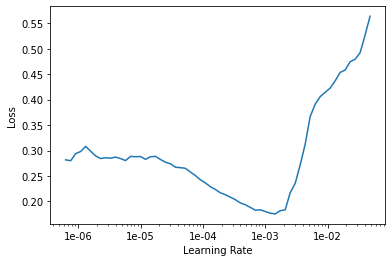

In [24]:
model.recorder.plot()

In [25]:
lr_range = [1e-04,1e-028]

In [26]:
model.fit_one_cycle(4, max_lr=slice(lr_range[0],lr_range[1]))

epoch,train_loss,valid_loss,accuracy,time
0,0.307616,0.319247,0.902778,00:15
1,0.318418,0.331132,0.902778,00:16
2,0.280540,0.341471,0.888889,00:15
3,0.267325,0.347561,0.888889,00:15


In [33]:
model.save('stage-2')

### Intrepreting the Results

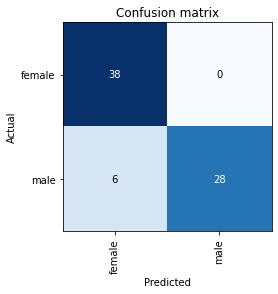

In [34]:
cm = ClassificationInterpretation.from_learner(model).plot_confusion_matrix()

It look like our model has predictied 6 males images to be female. Let's check these images to check the noise on the incorrect images

<b> Losses </b>

In [46]:
interp = ClassificationInterpretation.from_learner(model)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [47]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

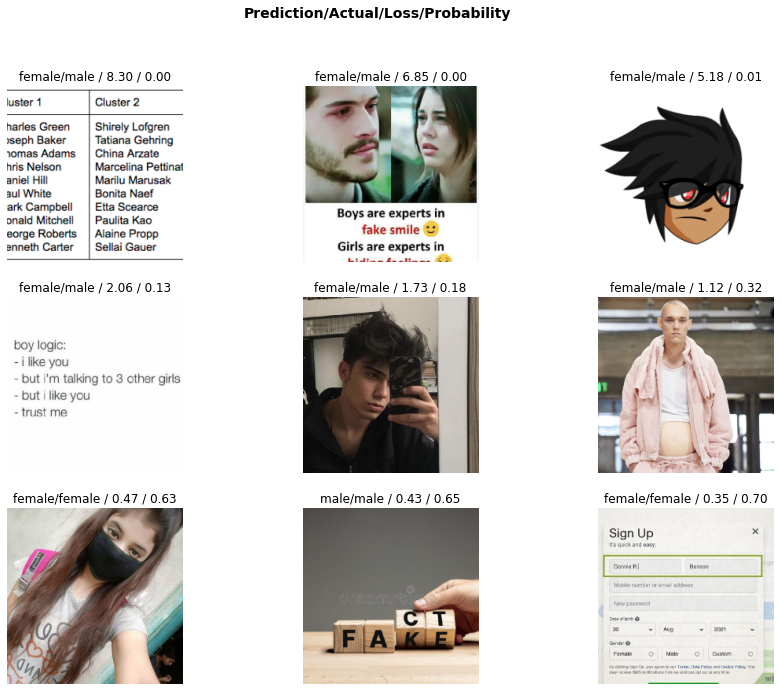

In [48]:
interp.plot_top_losses(9, figsize=(15,11))

### Cleaning the Noise

In [35]:
from fastai.widgets import *

In [36]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [37]:
model1 = cnn_learner(db, models.resnet34, metrics=accuracy)

model1.load('stage-2');

In [38]:
ds, idxs = DatasetFormatter().from_toplosses(model)

In [39]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Making Predictions

In [27]:
model.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (290 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
male,male,male,male,male
Path: data/genders;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
female,female,female,male,male
Path: data/genders;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [28]:
model.export()

In [29]:
loc = 'WIN_20211229_22_23_20_Pro.jpg'

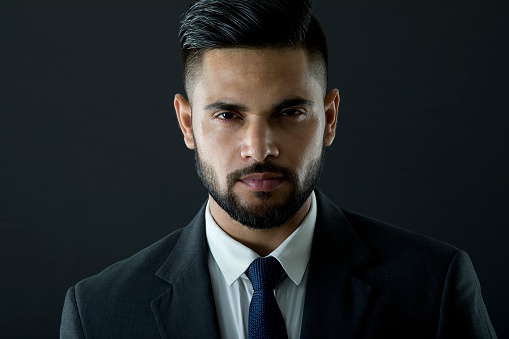

In [31]:
img = open_image(loc)
img

In [32]:
path

PosixPath('data/genders')

In [33]:
cnn = load_learner(path)

In [40]:
pred_class,pred_idx,outputs = cnn.predict(img)
pred_class.obj

'male'

In [39]:
pred_idx.item

'female'

In [44]:
pred_class.obj

'male'